In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

# Domain decomposition method (DDM)
## Test1 of L-shape domain problem in IJNME

<br />
<img align="left" src="img/Test1.png" alt="Drawing" style="width: 600px;"/>
<br /><br /><br />

### Step1. Setup BEM subdomains

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4 E-T(4,0)
[Mesh] Number of Nodes:12 E-T(12-0)


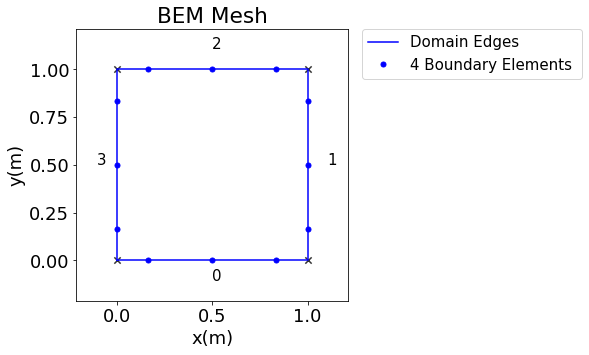

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:7 E-T(7,0)
[Mesh] Number of Nodes:21 E-T(21-0)


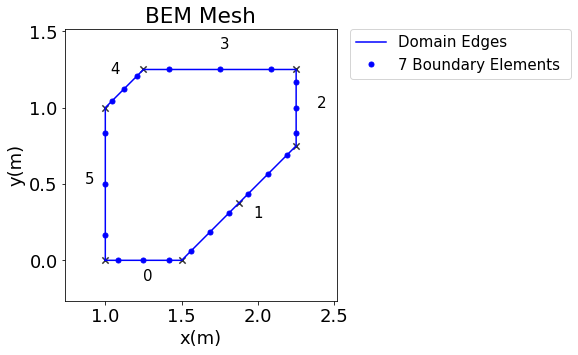

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, 10)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4 E-T(4,0)
[Mesh] Number of Nodes:12 E-T(12-0)


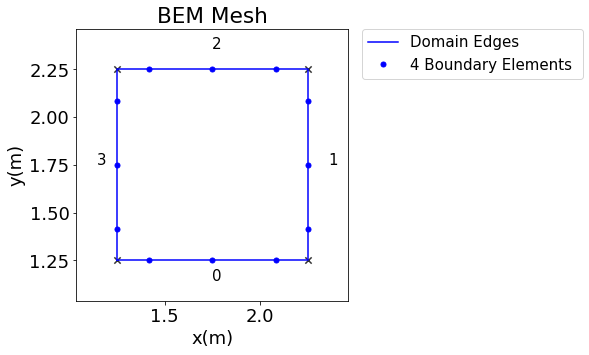

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(2, 100)]


In [2]:
#####Subdomain1########
BEM_Case1=BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case1.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,0)]

BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

#####Subdomain2########
BEM_Case2=BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (1.5, 0.0), (2.25, 0.75),(2.25,1.25),(1.25,1.25),(1.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case2.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")
BEM_Case2.plot_Mesh()

#2.Set Boundary condition
bc0=[(1,10)]
bc1=[(5,0),(3,0)]
#bc1=[(3,1)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

#####Subdomain3########
BEM_Case3=BEM2D()

#1.Build Mesh
Boundary_vert=[(1.25, 1.25), (2.25, 1.25), (2.25, 2.25), (1.25, 2.25)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case3.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")
BEM_Case3.plot_Mesh()

#2.Set Boundary condition
bc0=[(2,100)]
bc1=[(0,0)]
#bc1=[(3,1)]
BEM_Case3.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

### Step2. Setup iterative coupling solver

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


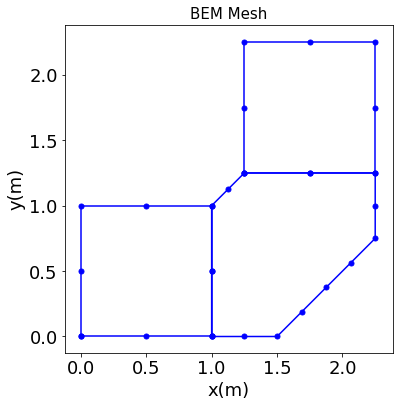

In [9]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled
CommonEdges=[[(1.0, 0.0), (1.0, 1.0)],
             [(1.25, 1.25), (2.25, 1.25)]
            ]
Connects=[[(1,0)],  #BEM_case1 connect with BEM_case2(1) at its face 1 
          [(0,0),(2,1)],  #BEM_case2 coonect with BEM_case1(0) at its face 3
          [(1,1)]] 
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)

### Step3. Parallel Robin-Robin Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


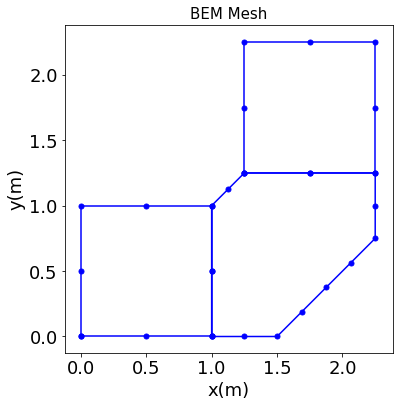

1	1.0		alpha:	0.5
2	0.49910525295432856		alpha:	0.5
3	0.425687214856994		alpha:	0.9983898652389086
4	0.1499375894666098		alpha:	1.001356793589939
5	0.10788871424522196		alpha:	1.830773137673158
6	0.03555666585892264		alpha:	1.829314791871798
7	0.016810150069868784		alpha:	0.6869603355371491
8	0.000680025089282528		alpha:	0.6678385106252132
9	0.0001375027237657381		alpha:	0.6890336467943317
10	0.00026614768803526266		alpha:	2.006603930530842
11	2.6680653041302816e-05		alpha:	2.016262450452302
12	1.9357740612546633e-05		alpha:	3.0209038499600327
13	7.843094321631466e-06		alpha:	1.4036283392698479
Converged at 13 Steps! TOL= 1e-05
Dirichelt [57.48717584 54.8200556  52.15428996]
Robin [20.45345243  9.63769623 -1.16903574]


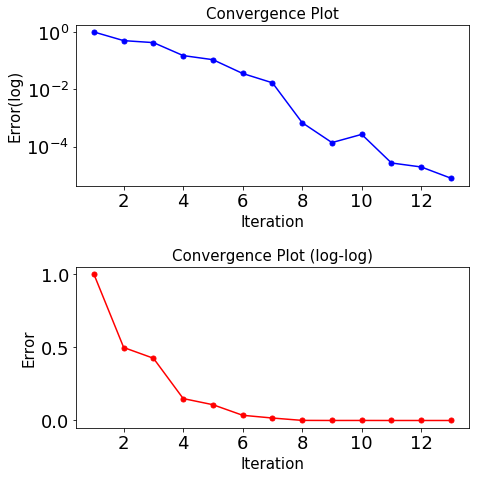

In [4]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-RR",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Neumann-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


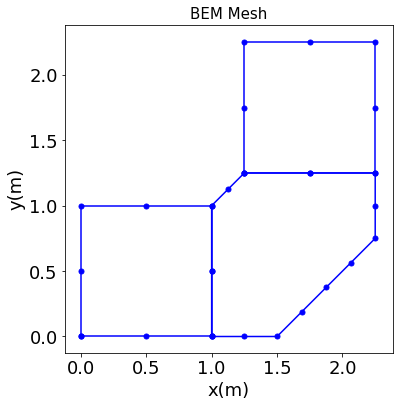

1	1.2502234867972664		alpha:	0.5
2	0.07677517945053083		alpha:	0.5
3	0.013429669163898565		alpha:	0.1234130421059789
4	0.12492943971092331		alpha:	-1.5172228191068693
5	0.07857907780899016		alpha:	0.7830743376740382
6	0.06835176464552158		alpha:	1.7302842971748036
7	0.0041228198975269935		alpha:	1.6602032143254657
8	0.0014907040849727162		alpha:	0.3799440179705937
9	0.0015030859433590468		alpha:	0.6670289978045962
10	0.0023699868716487004		alpha:	1.9431089634364702
11	0.00013551196799098183		alpha:	1.8031489842552793
12	2.069796399251078e-05		alpha:	-0.07509113048091595
13	0.0008547459557621532		alpha:	-2.5935956687887165
14	0.00035759062711722807		alpha:	0.3568156621495322
15	0.00019425825489621497		alpha:	0.6160821728213077
16	8.585887368379427e-05		alpha:	0.9087806741758973
17	7.07317971494453e-05		alpha:	1.5613697212659567
18	7.716115296062116e-06		alpha:	1.554063269292759
Converged at 18 Steps! TOL= 1e-05
Dirichelt [-0.00923278  0.0005655   0.01115382]
Neumann [-100.02965834 -100.

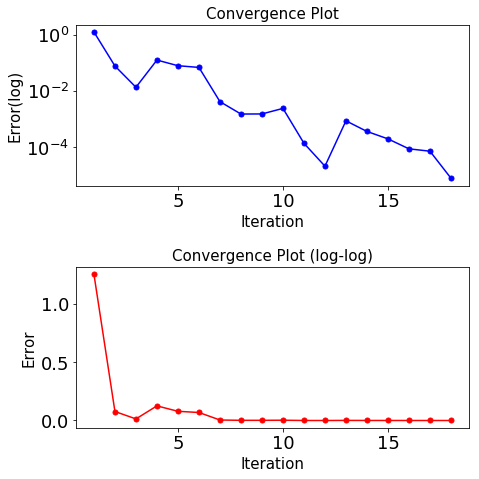

In [5]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-NN",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Dirichlet-Dirichlet Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


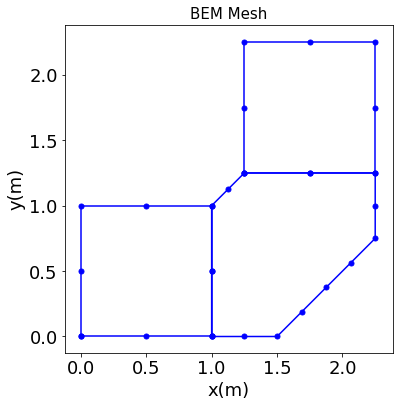

1	0.7425415116345598		alpha:	0.5
2	0.5506069124677462		alpha:	0.5
3	0.4161135340058549		alpha:	0.11355656215993774
4	0.10956942933304144		alpha:	0.10010948157878115
5	0.02207116483106719		alpha:	0.09868978583889991
6	0.008968492125259861		alpha:	0.1244626319785896
7	0.007709363020608682		alpha:	0.21087866351114773
8	0.003722307827892143		alpha:	0.2933955134948201
9	0.0015632835972400616		alpha:	0.1963302909343132
10	0.0009496287132474062		alpha:	0.0909484564807853
11	3.566706863448153e-05		alpha:	0.09065746811545448
12	2.4278194378087922e-05		alpha:	0.13628374864283432
13	8.929595314790733e-06		alpha:	0.16887190886722586
Converged at 13 Steps! TOL= 1e-05
Dirichelt [57.48695331 54.81972385 52.15392082]
Neumann [-37.0339623  -45.18309782 -53.32435604]


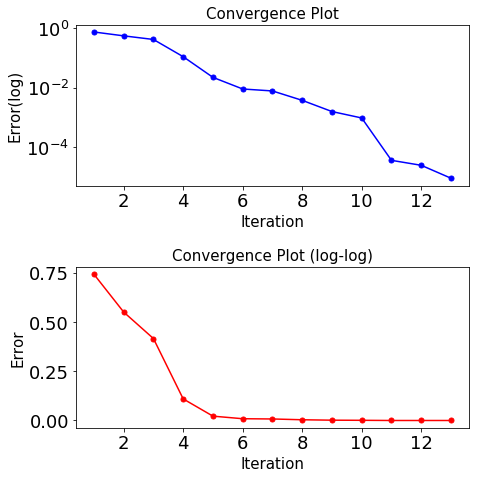

In [10]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-DD",TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


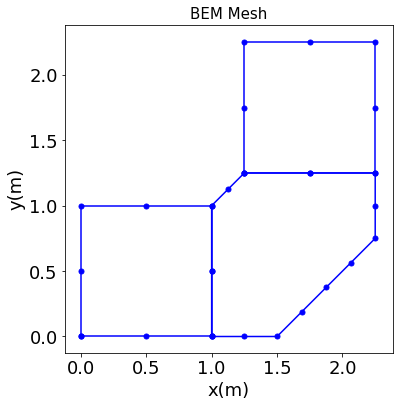

1	1.0		alpha:	0.5
2	1.1468415329565318		alpha:	0.5
3	0.3920495439312679		alpha:	0.6644546033087234
4	0.04353218705297893		alpha:	0.7263588868055518
5	0.008304596818904749		alpha:	0.6235563344011179
6	0.0038423919433048515		alpha:	0.5082044568158305
7	0.0010057397852165657		alpha:	0.6139497814011519
8	0.00012275263387402063		alpha:	0.6708382537534399
9	5.2038976050505826e-05		alpha:	0.7082327514997855
10	1.7223275856105995e-05		alpha:	0.7706754193788656
11	4.4328298776756045e-06		alpha:	0.6339837263190776
Converged at 11 Steps! TOL= 1e-05
Dirichelt [34.91433242 34.7048768  33.97860693]
Neumann [-29.47881139 -29.73004288 -33.27278912]


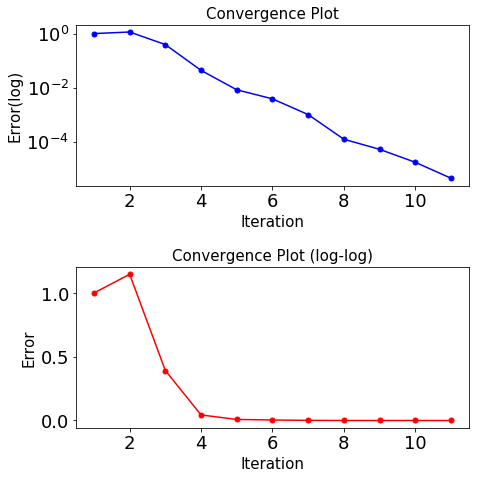

In [7]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

[Visulization] Plotting Solution


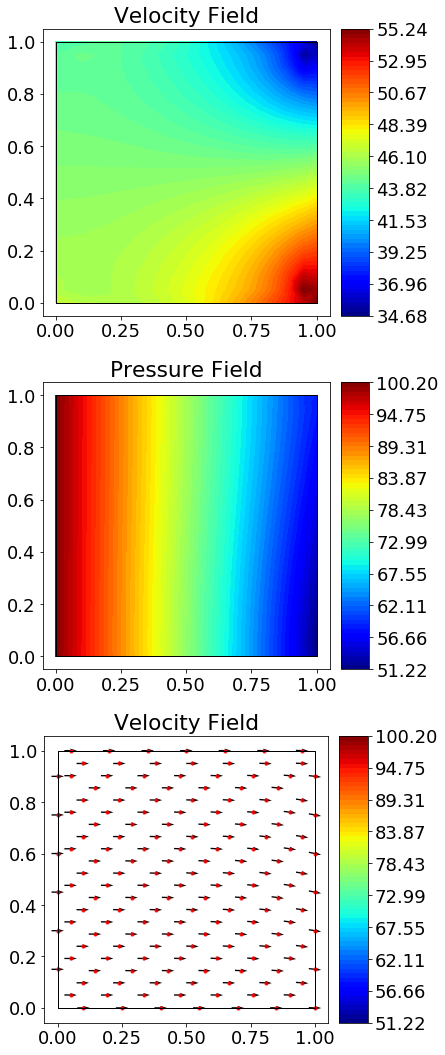

[Visulization] Plotting Solution


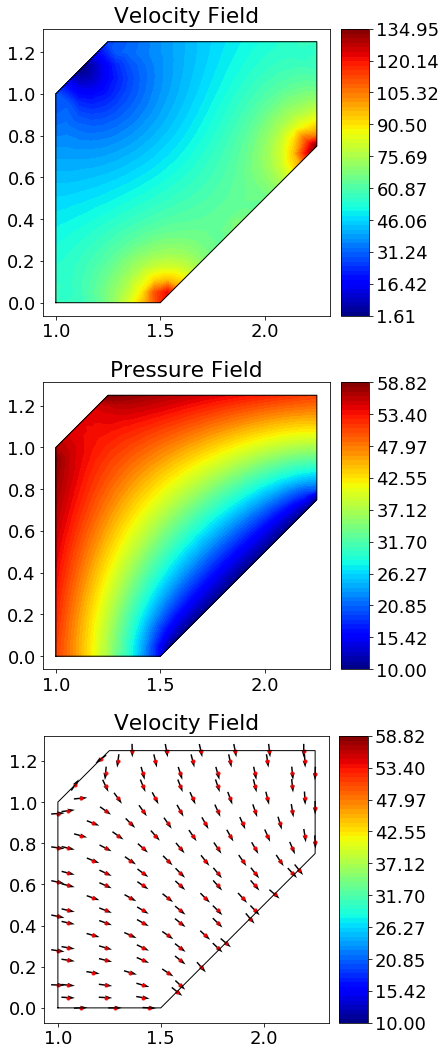

[Visulization] Plotting Solution


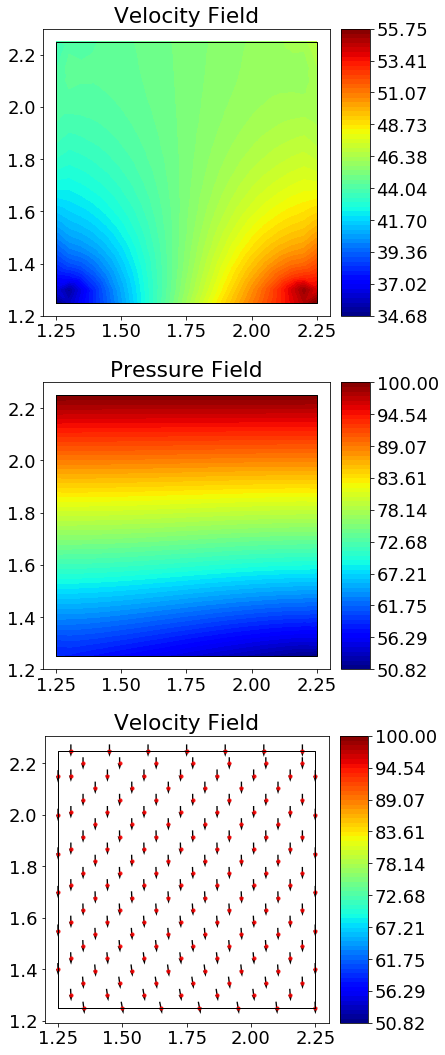

In [11]:
#Pressure and velocity contour results
PUV1=BEM_Case1.PostProcess.plot_Solution()
PUV2=BEM_Case2.PostProcess.plot_Solution()
PUV2=BEM_Case3.PostProcess.plot_Solution()

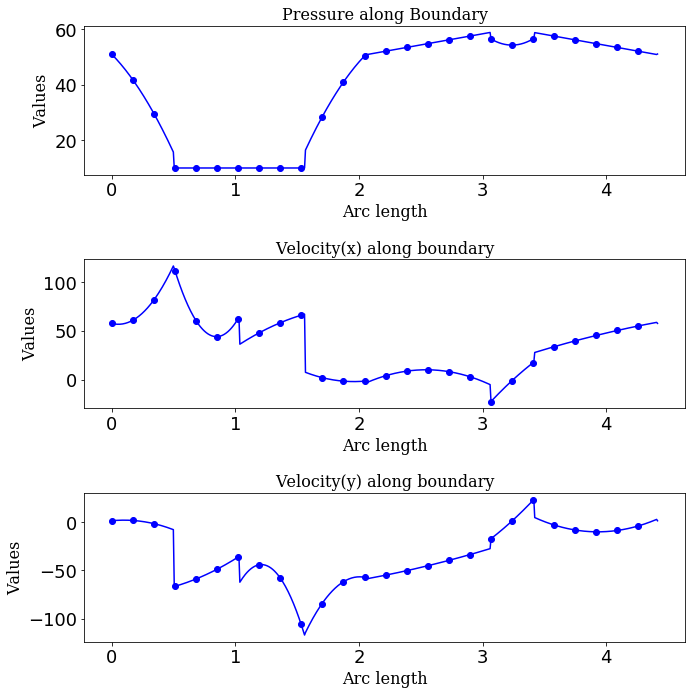

In [12]:
#Pressure and velocity along the boundary
P=BEM_Case2.PostProcess.plot_SolutionBD()